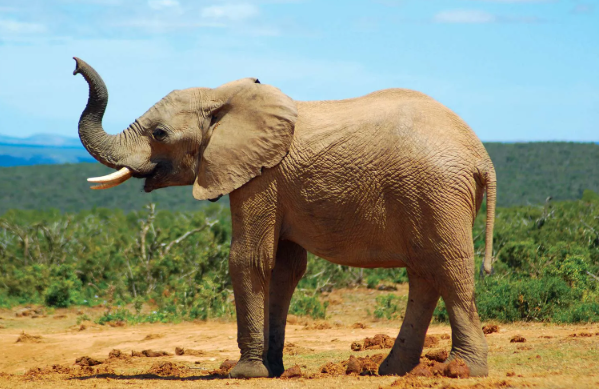

Image Size: Height = 389, Width = 599, Channels = 3
Total Image Pixels: 233011


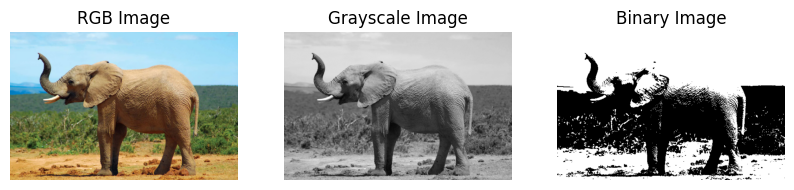

Black Pixel Area: 102056 pixels
Image Size (in pixels): 389 x 599


In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # Import cv2_imshow

# 1. Read the image
image_bgr = cv2.imread('/content/elephant.png')

# 2. Display the original image (in BGR)
cv2_imshow(image_bgr) # Use cv2_imshow instead of cv2.imshow
# cv2.waitKey(0) # Remove this line
# cv2.destroyAllWindows() # Remove this line

# 3. Extraction of image size
height, width, channels = image_bgr.shape
print(f"Image Size: Height = {height}, Width = {width}, Channels = {channels}")

# 4. Calculation of image pixels
total_pixels = height * width
print(f"Total Image Pixels: {total_pixels}")

# ... (rest of your code) ...
# 5. Convert RGB (BGR to RGB) and grayscale
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)  # Convert to RGB
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)  # Convert to Grayscale

# 6. Convert to Binary image using thresholding
_, image_binary = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)

# Display the RGB, Grayscale, and Binary images
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('RGB Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_binary, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.show()

# Count the area of black pixels in the binary image
black_pixels = np.sum(image_binary == 0)
print(f"Black Pixel Area: {black_pixels} pixels")
print(f"Image Size (in pixels): {height} x {width}")


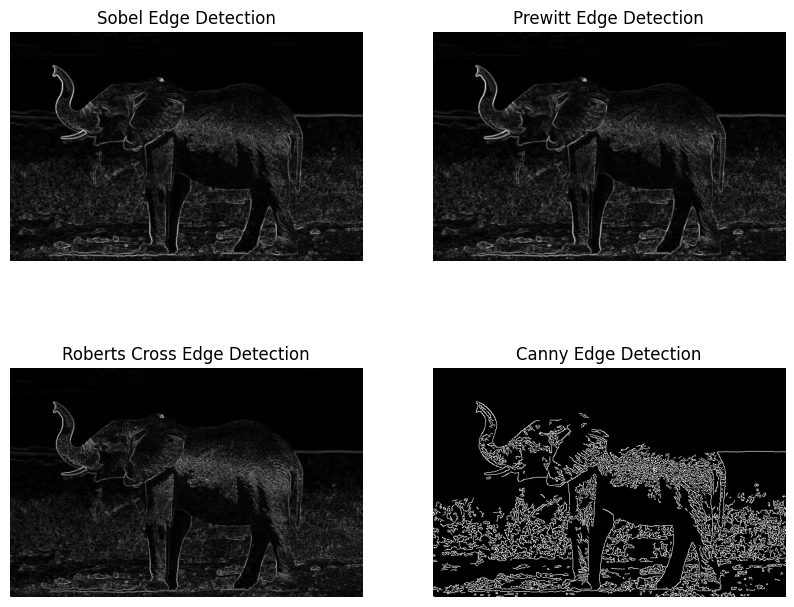

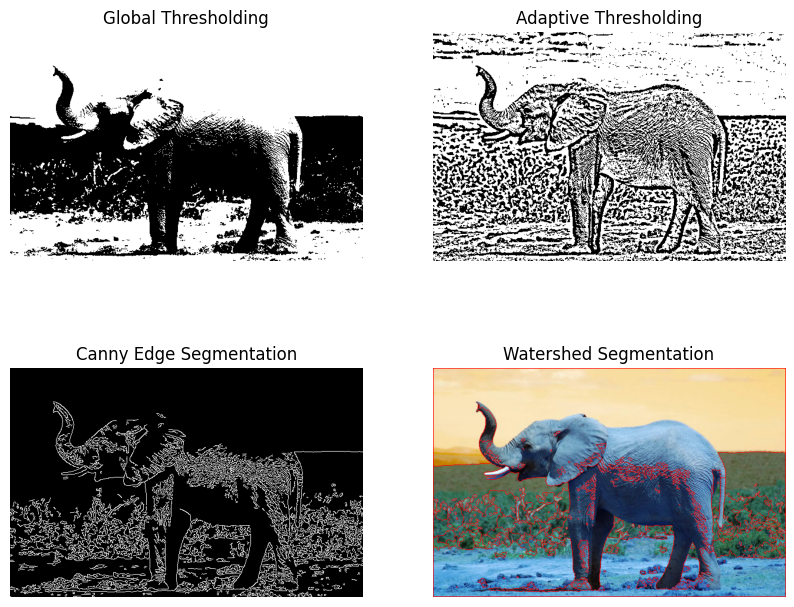

In [ ]:
# 1. Perform edge detection using various operators
# Sobel Operator
sobel_x = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

# Prewitt Operator (Approximation of Sobel)
kernel_prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
kernel_prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
prewitt_x = cv2.filter2D(image_gray, cv2.CV_64F, kernel_prewitt_x) # Change -1 to cv2.CV_64F
prewitt_y = cv2.filter2D(image_gray, cv2.CV_64F, kernel_prewitt_y) # Change -1 to cv2.CV_64F
prewitt_edges = cv2.magnitude(prewitt_x, prewitt_y)

# Roberts Cross Operator
kernel_roberts_x = np.array([[1, 0], [0, -1]])
kernel_roberts_y = np.array([[0, 1], [-1, 0]])
roberts_x = cv2.filter2D(image_gray, cv2.CV_64F, kernel_roberts_x) # Change -1 to cv2.CV_64F
roberts_y = cv2.filter2D(image_gray, cv2.CV_64F, kernel_roberts_y) # Change -1 to cv2.CV_64F
roberts_edges = cv2.magnitude(roberts_x, roberts_y)

# Canny Edge Detector
canny_edges = cv2.Canny(image_gray, 100, 200)

# Display edge detection results
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(roberts_edges, cmap='gray')
plt.title('Roberts Cross Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()

# 2. Perform Image Segmentation using various techniques
# i. Global Thresholding for Image Segmentation
_, global_thresh = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)
# otsu
# ii. Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# iii. Edge Detection for Segmentation (Canny)
canny_segmented = cv2.Canny(image_gray, 100, 200)

# iv. Region-Based Segmentation (Watershed Algorithm)
# Convert image to grayscale and then to binary for watershed

# morphological operations : thresholding
ret, markers = cv2.connectedComponents(image_binary)   # overlapping objects , connected components detected, diff regions marked with markers
markers = markers + 1
markers[image_binary == 0] = 0
watershed = cv2.watershed(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB), markers)
image_bgr[markers == -1] = [255, 0, 0]  # Mark watershed boundaries in red

# Display segmentation results
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(global_thresh, cmap='gray')
plt.title('Global Thresholding')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive Thresholding')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(canny_segmented, cmap='gray')
plt.title('Canny Edge Segmentation')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(image_bgr)
plt.title('Watershed Segmentation')
plt.axis('off')

plt.show()
